<a href="https://colab.research.google.com/github/LUPRWEST/machine-learning/blob/main/pose_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터 셋 주소~!**

[]()https://www.kaggle.com/datasets/rawatjitesh/body-pose-recognition


In [ ]:
# 드라이브 불러오기
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/data/kaggle_pose/"

from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/data/kaggle_pose

Mounted at /content/gdrive
/content/gdrive/My Drive/data/kaggle_pose


In [ ]:
!ls

test  train


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy
import os 
import tensorflow as tf
import cv2

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [ ]:
# 이미지 전처리
train_datagen = ImageDataGenerator(rescale= 1./255, zoom_range = 0.2, rotation_range = 90, 
                                   horizontal_flip= True)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size= (128, 128),
                                                 batch_size= 32,
                                                 class_mode= 'categorical')

Found 1004 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)
test_set = test_datagen.flow_from_directory('test',
                                            target_size= (128, 128),
                                            batch_size= 32,
                                            class_mode= 'categorical')

Found 250 images belonging to 5 classes.


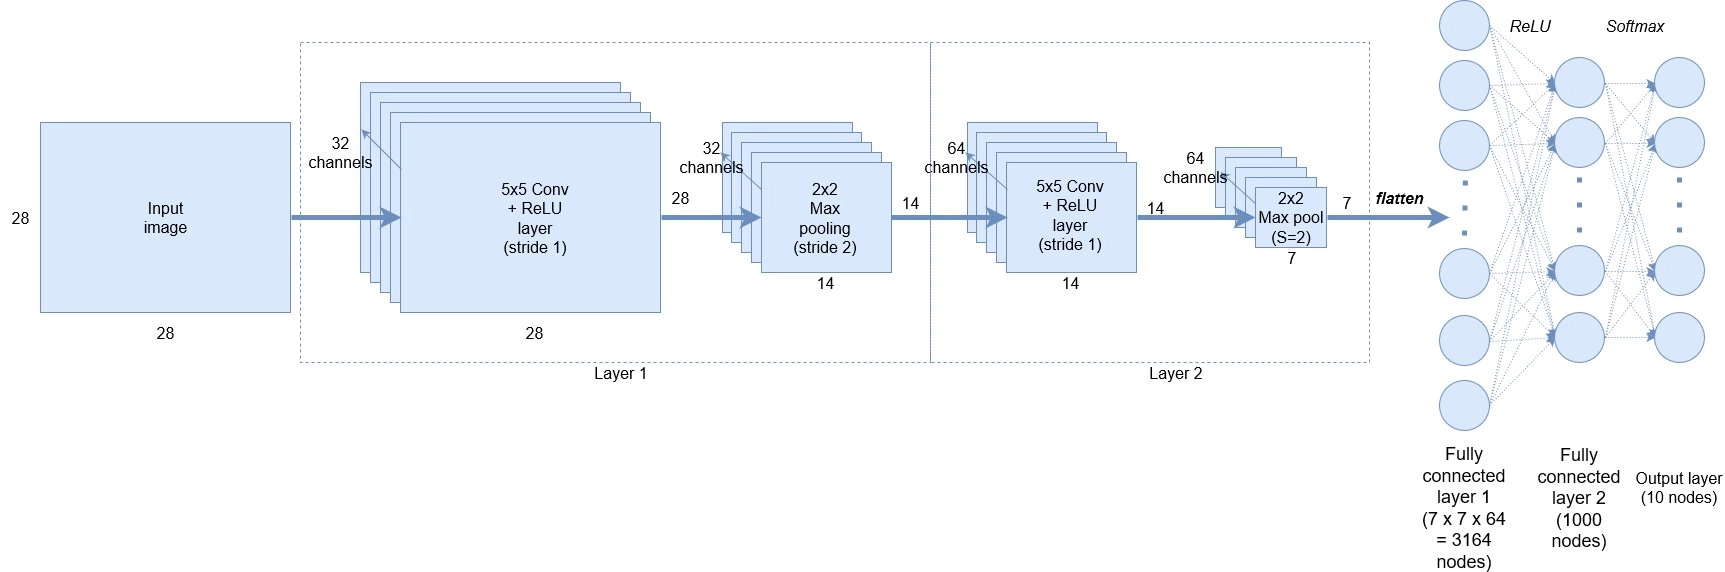

In [ ]:
# model design

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (128,128, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64,(3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# fully connected layer 

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
# model compile
model.compile(loss= 'categorical_crossentropy',
              optimizer= SGD(learning_rate = 0.01), 
              metrics=['accuracy'])

In [ ]:
# model training 

history = model.fit(train_set, epochs = 35)

Epoch 1/35
32/32 [==============================] - 8s 160ms/step - loss: 1.6282 - accuracy: 0.1922
Epoch 2/35
32/32 [==============================] - 5s 157ms/step - loss: 1.6101 - accuracy: 0.1942
Epoch 3/35
32/32 [==============================] - 5s 155ms/step - loss: 1.6072 - accuracy: 0.2122
Epoch 4/35
32/32 [==============================] - 5s 156ms/step - loss: 1.6100 - accuracy: 0.2151
Epoch 5/35
32/32 [==============================] - 5s 155ms/step - loss: 1.6064 - accuracy: 0.2161
Epoch 6/35
32/32 [==============================] - 5s 158ms/step - loss: 1.5997 - accuracy: 0.2819
Epoch 7/35
32/32 [==============================] - 6s 182ms/step - loss: 1.5933 - accuracy: 0.3058
Epoch 8/35
32/32 [==============================] - 5s 157ms/step - loss: 1.5822 - accuracy: 0.3018
Epoch 9/35
32/32 [==============================] - 5s 158ms/step - loss: 1.5450 - accuracy: 0.4293
Epoch 10/35
32/32 [==============================] - 5s 156ms/step - loss: 1.4623 - accuracy: 0.5458

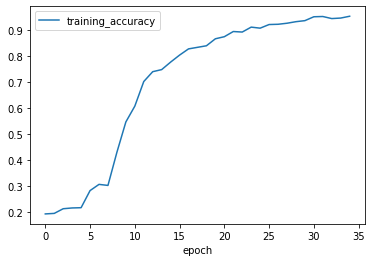

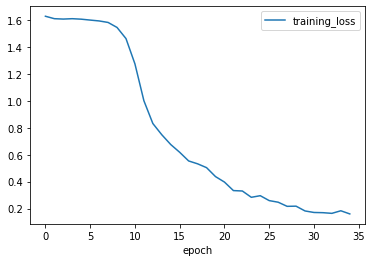

In [ ]:
plt.figure(1)
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.legend()
plt.show()

plt.figure(2)
plt.xlabel('epoch')
plt.plot(history.history['loss'], label='training_loss')
plt.legend()
plt.show()

In [ ]:
# model evaluate
test_loss, test_acc = model.evaluate(test_set) 
print(test_loss)
print(test_acc)

8/8 [==============================] - 1s 71ms/step - loss: 0.4948 - accuracy: 0.8720
0.49481475353240967
0.871999979019165
